# RNN LSTM com 3 entradas e 1 saída

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:4].values

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))

# sc_open = MinMaxScaler(feature_range = (0, 1))
# sc_high = MinMaxScaler(feature_range = (0, 1))
# sc_low = MinMaxScaler(feature_range = (0, 1))

training_set_scaled = sc.fit_transform(training_set)

# training_set_scaled = sc.fit_transform(training_set)
# training_set_scaled = sc.fit_transform(training_set)
# training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0:3])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
38/38 [==============================] - 17s 185ms/step - loss: 0.0500
Epoch 2/10
38/38 [==============================] - 7s 199ms/step - loss: 0.0067
Epoch 3/10
38/38 [==============================] - 6s 150ms/step - loss: 0.0061
Epoch 4/10
38/38 [==============================] - 6s 153ms/step - loss: 0.0053
Epoch 5/10
38/38 [==============================] - 7s 180ms/step - loss: 0.0044
Epoch 6/10
38/38 [==============================] - 6s 172ms/step - loss: 0.0049
Epoch 7/10
38/38 [==============================] - 7s 178ms/step - loss: 0.0048
Epoch 8/10
38/38 [==============================] - 6s 166ms/step - loss: 0.0042
Epoch 9/10
38/38 [==============================] - 7s 180ms/step - loss: 0.0046
Epoch 10/10
38/38 [==============================] - 8s 200ms/step - loss: 0.0040


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:4].values

### Getting the predicted stock price of 2017

In [ ]:
# dataset_total = pd.concat([dataset_train['Open'], dataset_test['Open']], axis = 0)
# dataset_total_1 = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 1)
# dataset_total_inner = pd.concat((dataset_train['Open'], dataset_test['Open']), join = 'inner')
# dataset_total_outer = pd.concat((dataset_train['Open'], dataset_test['Open']), join = 'outer')
# dataset_total_nada = pd.concat((dataset_train['Open'], dataset_test['Open']))


In [ ]:
dataset_total = pd.concat([dataset_train, dataset_test])

In [ ]:
aux = len(dataset_total['Open']) - len(dataset_test['Open']) - 60
# inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60].values

In [ ]:
inputs = dataset_total[['Open', 'High', 'Low']].copy()

In [ ]:
inputs = inputs.to_numpy()

In [ ]:

# inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0:3])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))
predicted_stock_price = regressor.predict(X_test)

In [ ]:
predicted_stock_price = np.concatenate((predicted_stock_price, predicted_stock_price, predicted_stock_price), axis=1)

In [ ]:

predicted_stock_price_scaled = sc.inverse_transform(predicted_stock_price)[:,0]

### Visualising the results

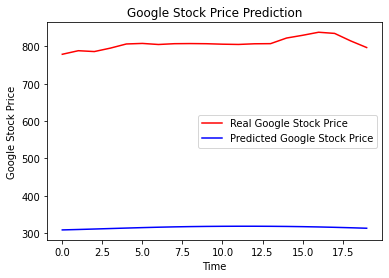

In [ ]:
plt.plot(real_stock_price[:,0], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_scaled, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()